In [ ]:
#imports
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#functions
def slr_delta(x,y):
    return len(x)*np.sum(x**2)-(np.sum(x))**2

def slr_slope(x,y):
    return (len(x)*np.sum(x*y)-np.sum(x)*np.sum(y))/slr_delta(x,y)

def slr_intercept(x,y):
    return (np.sum(x**2)*np.sum(y)-np.sum(x)*np.sum(x*y))/slr_delta(x,y)

def wlr_delta(x,w):
  return np.sum(w)*np.sum(w*x**2)-(np.sum(w*x))**2

def wlr_slope(x,y,w):
    return (np.sum(w)*np.sum(w*x*y)-np.sum(w*x)*np.sum(w*y))/wlr_delta(x,w)

def wlr_intercept(x,y,w):
    return (np.sum(w*x**2)*np.sum(w*y)-np.sum(w*x)*np.sum(w*x*y))/wlr_delta(x,w)

def wlr_slope_uncertainty(x,w):
    return np.sqrt(np.sum(w)/wlr_delta(x,w))

In [ ]:
#data
t_sqrd = np.array([1.293, 1.583, 2.024, 2.401, 2.719, 3.004])**2
alpha_tsqrd = 2*np.sqrt(t_sqrd)*np.array([0.0019, 0.0021, 0.0038, 0.0010, 0.0009, 0.0022])
i_tot = 0.00000628 + 0.0000025*np.array([0, 1, 3, 5, 7, 9])
alpha_i_tot = np.sqrt(1.5e-8**2 + np.array([0, 1, 3, 5, 7, 9])*3.3e-8**2)

In [ ]:
#simple linear regression
k_slr = slr_slope(t_sqrd,i_tot)*4*np.pi**2
alpha_i_tot_prime = np.sqrt(alpha_i_tot**2 + (slr_slope(t_sqrd,i_tot)*alpha_tsqrd)**2)

In [ ]:
#weighted linear regression
w = 1/alpha_i_tot**2
m_wlr,c_wlr,alpha_m_wlr = wlr_slope(t_sqrd,i_tot,w), wlr_intercept(t_sqrd,i_tot,w), wlr_slope_uncertainty(t_sqrd,w)
k_wlr,alpha_k_wlr = 4*np.pi**2*np.array([m_wlr, alpha_m_wlr])
k_wlr,alpha_k_wlr

(np.float64(0.00012085030778736584), np.float64(3.5120089297173163e-07))

Text(0.5, 1.0, 'Weighted Linear Regression of Measured Period versus Moment of Inertia')

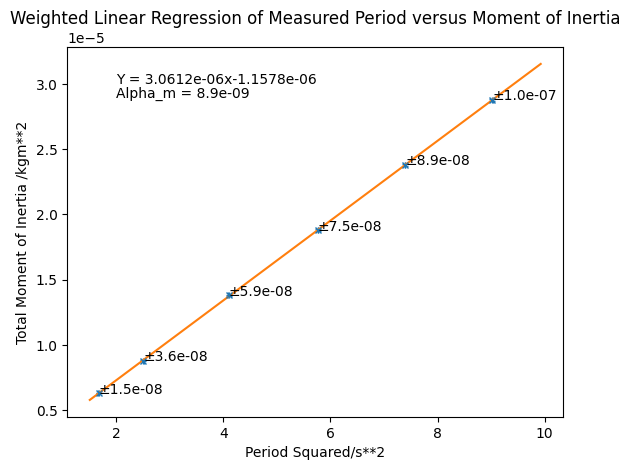

In [ ]:
#plot
plt.errorbar(t_sqrd,i_tot, fmt="x", markersize=4, capsize=2, xerr = alpha_tsqrd, yerr=alpha_i_tot)
x_fit = np.linspace(min(t_sqrd)*0.9,max(t_sqrd)*1.1,100)
y_fit = m_wlr*x_fit + c_wlr
plt.plot(x_fit,y_fit)
[plt.text(x, y, f'±{err:.1e}') for x, y, err in zip(t_sqrd, i_tot, alpha_i_tot)]
plt.xlabel("Period Squared/s**2")
plt.ylabel("Total Moment of Inertia /kgm**2")
plt.text(2, 3e-5, "Y = 3.0612e-06x-1.1578e-06")
plt.text(2,2.9e-5,"Alpha_m = 8.9e-09")
plt.title("Weighted Linear Regression of Measured Period versus Moment of Inertia")

Text(0.5, 1.0, 'Normalised Residual Plot')

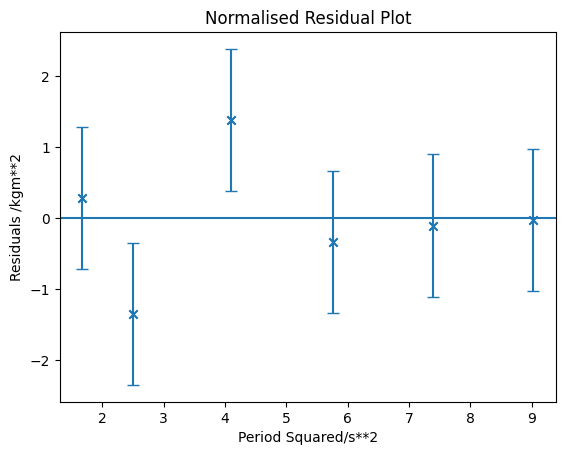

In [ ]:
r = (i_tot-(m_wlr*t_sqrd+c_wlr))/alpha_i_tot
plt.scatter(t_sqrd,r, marker = "x",label="Residuals")
plt.errorbar(t_sqrd, r, yerr=1, fmt='x', capsize=4)
plt.axhline(0)
plt.xlabel("Period Squared/s**2")
plt.ylabel("Residuals /kgm**2")
plt.title("Normalised Residual Plot")

In [ ]:
#chi squared anaysis

def chi2_torsion(x, y, y_err, m, c):
    exp =x*m+c
    chi2 = np.sum(((y-exp)**2)/(y_err**2))
    dof = len(x)-2
    chi2_reduced = chi2/dof
    return [chi2, chi2_reduced,dof]

chi_vals = chi2_torsion(t_sqrd, i_tot, alpha_i_tot, m_wlr, c_wlr)